In [2]:
## . . Import the plotting and libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import *

## . . For animation
from matplotlib import animation
from IPython.display import HTML

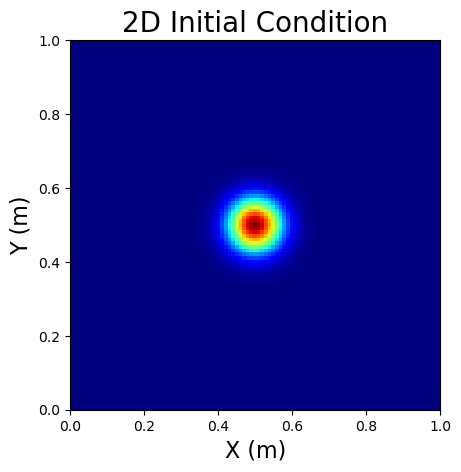

In [54]:
## . . Time axis parameters
nt,dt=121,0.01

## . . Space axis parameters
xmin,xmax,ymin,ymax=0,1,0,1
nx,ny=101,101
xx = np.linspace(xmin,xmax,nx)
yy = np.linspace(ymin,ymax,ny)
dx = xx[1]-xx[0]
dy = yy[1]-yy[0]

## . . Initial Condition
sigma=0.05
mx = (xmax-xmin)/2
my = (ymax-ymin)/2
U = np.zeros((nx,ny))

xxx, yyy = np.meshgrid(xx, yy, sparse=True)

U = np.exp(-(xxx-mx)**2/(2*sigma**2)-(yyy-my)**2/(2*(sigma**2)))

plt.figure()
plt.imshow(U,cmap='jet',extent=[xmin,xmax,ymin,ymax])
plt.xlabel('X (m)',fontsize=16);plt.ylabel('Y (m)',fontsize=16);
plt.title('2D Initial Condition',fontsize=20)
plt.show()

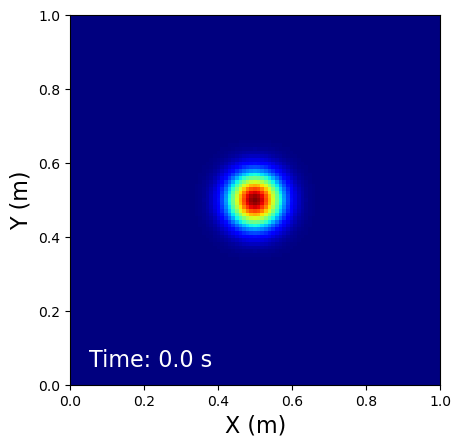

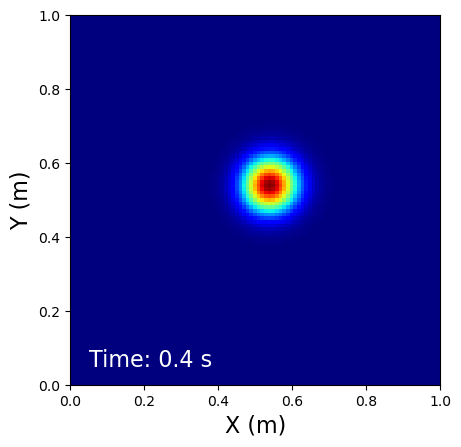

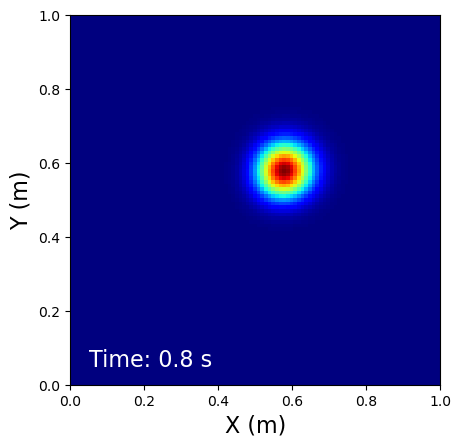

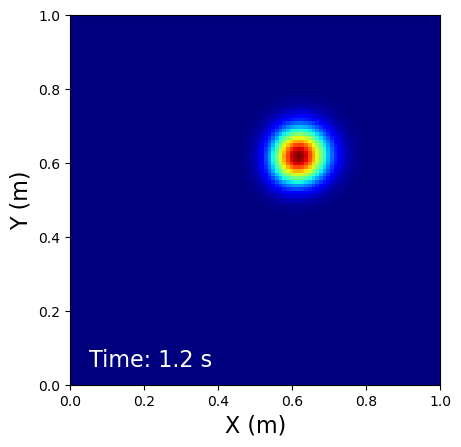

In [56]:
U = np.exp(-(xxx-mx)**2/(2*sigma**2)-(yyy-my)**2/(2*(sigma**2)))
def Advection_Lax_Wendroff_Solution(U,vx,vy,dx,dy,dt,L):
    Nx = U.shape[1]
    Ny = U.shape[0]
    # u = U.copy()
    u = U
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            A = -vx
            B = vy
            term1 = -dt / (2 * dx) * A * (u[i + 1, j] - u[i - 1, j])
            term2 = -dt / (2 * dy) * B * (u[i, j + 1] - u[i, j - 1])
            term3 = (dt**2) / (2 * (dx**2)) * A**2 * (u[i - 1, j] - 2 * u[i, j] + u[i + 1, j])
            term4 = (dt**2) / (2 * (dy**2)) * B**2 * (u[i, j - 1] - 2 * u[i, j] + u[i, j + 1])
            term5 = (dt**2) / (8 * dx * dy) * (A * B + B * A) * (
                (u[i + 1, j + 1] - u[i - 1, j + 1]) - (u[i + 1, j - 1] - u[i - 1, j - 1]))
            
            u[i, j] = u[i, j] + term1 + term2 + term3 + term4 + term5
    u[0,:]  = L
    u[-1,:] = L
    u[:,0]  = L
    u[:,-1] = L
    return u

vx = 0.1
vy = 0.1
L = 0

for i in range(nt):
    if i == 0:
        plt.figure()
        plt.imshow(U,cmap='jet',extent=[xmin,xmax,ymin,ymax])
        plt.xlabel('X (m)',fontsize=16);plt.ylabel('Y (m)',fontsize=16);
        plt.text(x= 0.05, y = 0.05, s='Time: {} s'.format(i*dt),fontsize=16, color = 'white')
        plt.show()
    Un = Advection_Lax_Wendroff_Solution(U,vx,vy,dx,dy,dt,L)
    if i !=0 and i%40 == 0:
        plt.figure()
        plt.imshow(Un,cmap='jet',extent=[xmin,xmax,ymin,ymax])
        plt.xlabel('X (m)',fontsize=16);plt.ylabel('Y (m)',fontsize=16);
        plt.text(x= 0.05, y = 0.05, s='Time: {} s'.format(i*dt),fontsize=16, color = 'white')
        plt.show()

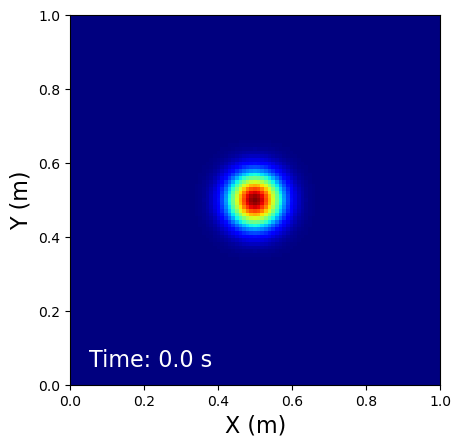

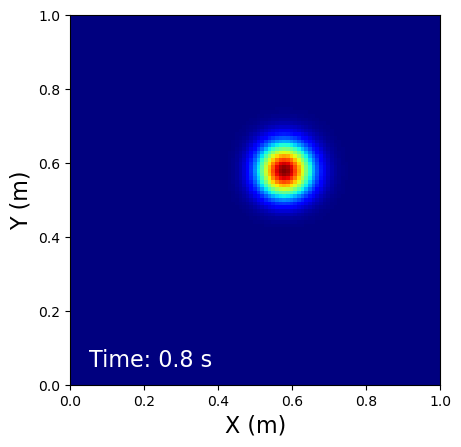

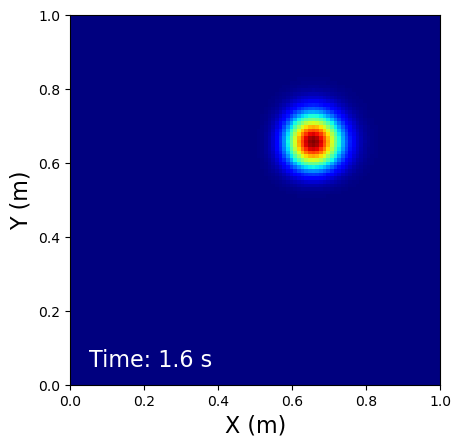

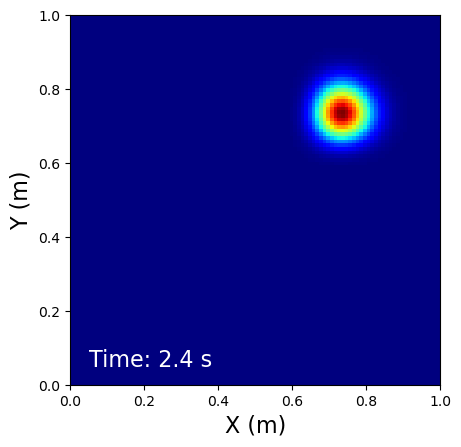

In [79]:
U = np.exp(-(xxx-mx)**2/(2*sigma**2)-(yyy-my)**2/(2*(sigma**2)))
def Advection_Lax_Wendroff_Solution(U,vx,vy,dx,dy,dt,L):
    '''
    USING VECTORIZATION TO SPEED UP
    '''

    u = U
    A = -vy
    B = vx
    u_ip1_j = u[2:, 1:-1]
    u_im1_j = u[:-2, 1:-1]
    u_i_jp1 = u[1:-1, 2:]
    u_i_jm1 = u[1:-1, :-2]
    
    term1 = -dt / (2 * dx) * A * (u_ip1_j - u_im1_j)
    term2 = -dt / (2 * dy) * B * (u_i_jp1 - u_i_jm1)
    
    u_im1_j = u[:-2, 1:-1]
    u_i_j = u[1:-1, 1:-1]
    u_ip1_j = u[2:, 1:-1]
    
    term3 = (dt**2) / (2 * (dx**2)) * A**2 * (u_im1_j - 2 * u_i_j + u_ip1_j)
    
    u_i_jm1 = u[1:-1, :-2]
    u_i_j = u[1:-1, 1:-1]
    u_i_jp1 = u[1:-1, 2:]
    
    term4 = (dt**2) / (2 * (dy**2)) * B**2 * (u_i_jm1 - 2 * u_i_j + u_i_jp1)
    
    u_ip1_jp1 = u[2:, 2:]
    u_im1_jp1 = u[:-2, 2:]
    u_ip1_jm1 = u[2:, :-2]
    u_im1_jm1 = u[:-2, :-2]
    
    term5 = (dt**2) / (8 * dx * dy) * (A * B + B * A) * (
        (u_ip1_jp1 - u_im1_jp1) - (u_ip1_jm1 - u_im1_jm1)
    )
    
    u[1:-1, 1:-1] = u_i_j + term1 + term2 + term3 + term4 + term5
    u[0,:]  = L
    u[-1,:] = L
    u[:,0]  = L
    u[:,-1] = L
    return u

vx = 0.1
vy = 0.1
L = 0
dt = 0.02
for i in range(nt):
    if i == 0:
        plt.figure()
        plt.imshow(U,cmap='jet',extent=[xmin,xmax,ymin,ymax])
        plt.xlabel('X (m)',fontsize=16);plt.ylabel('Y (m)',fontsize=16);
        plt.text(x= 0.05, y = 0.05, s='Time: {} s'.format(i*dt),fontsize=16, color = 'white')
        plt.show()
    Un = Advection_Lax_Wendroff_Solution(U,vx,vy,dx,dy,dt,L)
    if i !=0 and i%40 == 0:
        plt.figure()
        plt.imshow(Un,cmap='jet',extent=[xmin,xmax,ymin,ymax])
        plt.xlabel('X (m)',fontsize=16);plt.ylabel('Y (m)',fontsize=16);
        plt.text(x= 0.05, y = 0.05, s='Time: {} s'.format(i*dt),fontsize=16, color = 'white')
        plt.show()

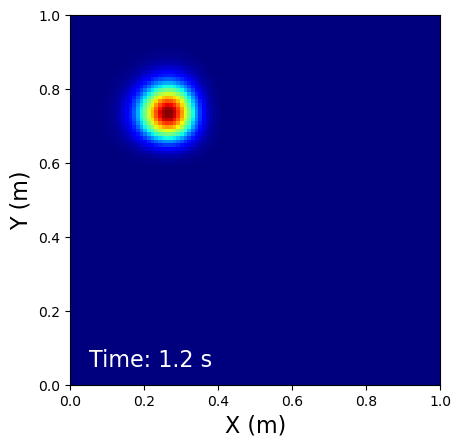

In [78]:
data = np.genfromtxt("U_matrix.txt")
plt.figure()
plt.imshow(data,cmap='jet',extent=[xmin,xmax,ymin,ymax])
plt.xlabel('X (m)',fontsize=16);plt.ylabel('Y (m)',fontsize=16);
plt.text(x= 0.05, y = 0.05, s='Time: {} s'.format(i*dt),fontsize=16, color = 'white')
plt.show()

In [64]:

for i in range(nt):

    if i == 0:
        # write code for save(U)

    Un = Advection_Lax_Wendroff_Solution(U,vx,vy,dx,dy,dt,L)
    if i !=0 and i%40 == 0:
        #write code f-r save Un

[[3.72007598e-44 2.69435542e-43 1.87493484e-42 ... 1.87493484e-42
  2.69435542e-43 3.72007598e-44]
 [2.69435542e-43 1.95145238e-42 1.35796711e-41 ... 1.35796711e-41
  1.95145238e-42 2.69435542e-43]
 [1.87493484e-42 1.35796711e-41 9.44975498e-41 ... 9.44975498e-41
  1.35796711e-41 1.87493484e-42]
 ...
 [1.87493484e-42 1.35796711e-41 9.44975498e-41 ... 9.44975498e-41
  1.35796711e-41 1.87493484e-42]
 [2.69435542e-43 1.95145238e-42 1.35796711e-41 ... 1.35796711e-41
  1.95145238e-42 2.69435542e-43]
 [3.72007598e-44 2.69435542e-43 1.87493484e-42 ... 1.87493484e-42
  2.69435542e-43 3.72007598e-44]]
